In [126]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_column',None)

In [127]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [128]:
df.iloc[34018]

Unnamed: 0        34019
carat               0.4
cut           Very Good
color                 I
clarity            VVS1
depth              60.8
table              58.0
price               849
x                  4.75
y                  4.83
z                  2.91
Name: 34018, dtype: object

In [129]:
df.price.unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [131]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [132]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [133]:
df["size"] = df["x"] * df["y"] * df["z"]

In [134]:
df['size'] = df['size'].round(2)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.51
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.08
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.72
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.92


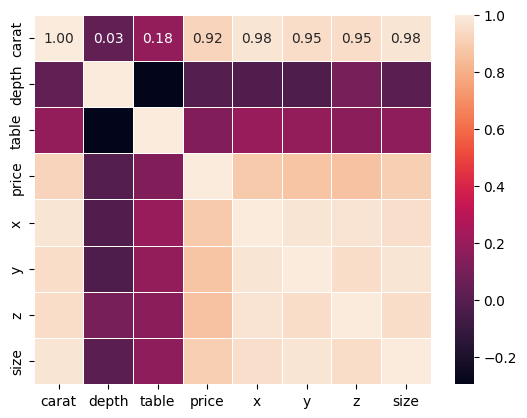

In [135]:
df_num=df.select_dtypes(include='number')
corr = df_num.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [136]:
correlation = df_num.corr()
correlation["price"].sort_values(ascending=False)

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [139]:
df.drop(columns=['x','y','z','depth','table'],inplace=True)

In [140]:
df.to_csv('diamondcleaned.csv',index=False)

In [13]:
from sklearn.preprocessing import LabelEncoder
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]=lb.fit_transform(data_frame[i])
    return data_frame
categoric_data=label_encoder_process(df.select_dtypes(include='object'))
categoric_data.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


In [14]:
df=pd.concat([df_num,categoric_data],axis=1)
df.head()

,carat,depth,table,price,x,y,z,size,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.20,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.51,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.08,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.72,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.92,1,6,3


In [15]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size', 'cut',
       'color', 'clarity'],
      dtype='object')

In [58]:
X=df[['carat','size', 'cut']]
y=df['price']

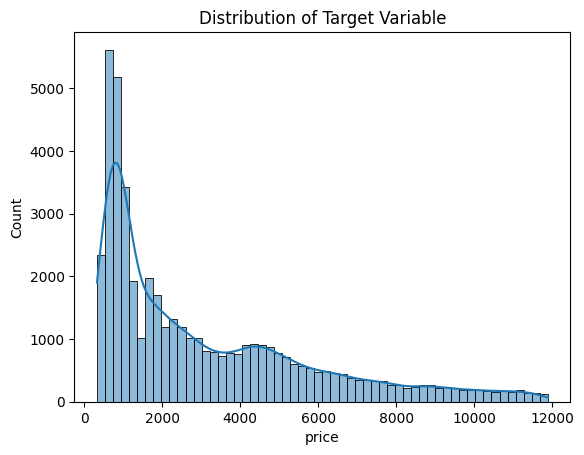

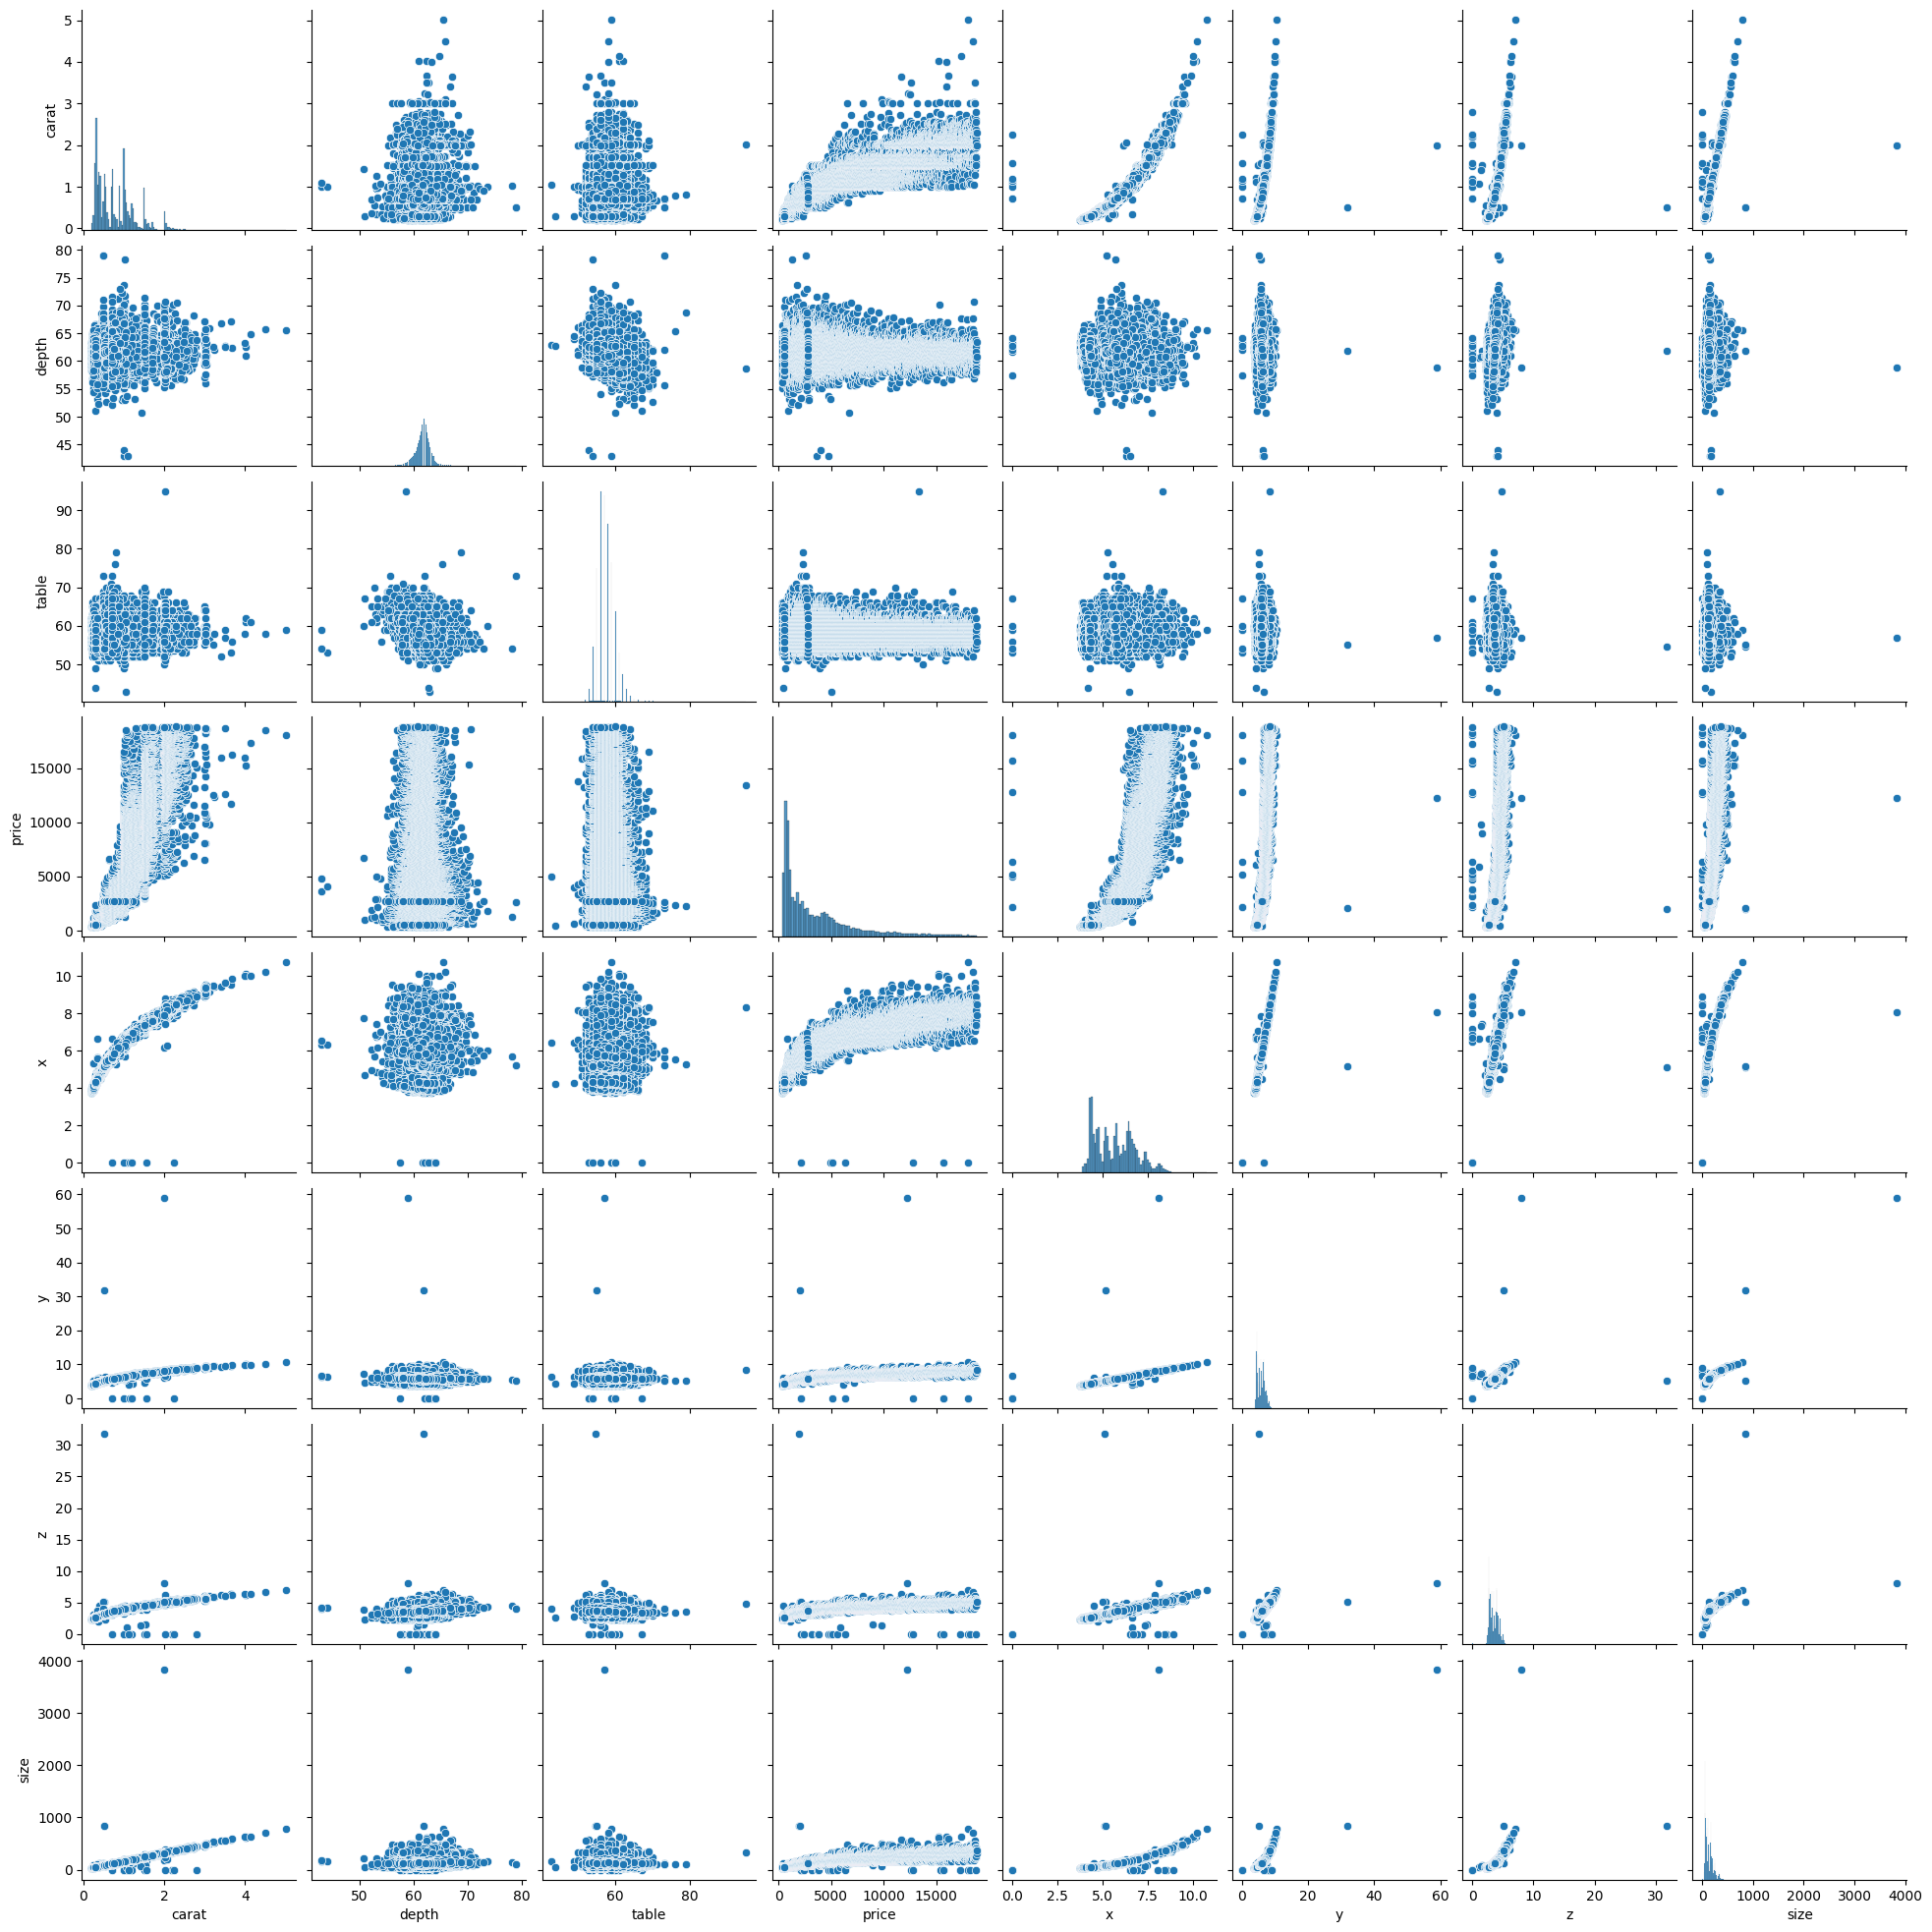

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
size       0
dtype: int64
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z          size  
count  53940.000000  53940.000000  53940.000000  
mean       5.734526      3.53873

In [137]:
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

sns.pairplot(df)
plt.show()

print(df.isnull().sum())

print(df.describe())


In [138]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[~outliers]
print(df_cleaned.shape)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(43152, 3)

(10788, 3)

(43152,)

(10788,)

In [82]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=5)
cross_val_score(knr,X,y,cv=kfold)

array([-1.22368422, -0.65299522,  0.53301464, -1.92369824, -0.75465139])

In [60]:
lr=LinearRegression()
lr.fit(X_train,y_train)
display(lr.score(X_train,y_train),
lr.score(X_test,y_test))

0.8500630514411764

0.849907806780976

In [61]:
lor=RandomForestRegressor(random_state=42)
lor.fit(X_train,y_train)
display(lor.score(X_train,y_train),
lor.score(X_test,y_test))

0.9740778352443208

0.8678601451017305

In [62]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
display(dt.score(X_train,y_train),
dt.score(X_test,y_test))

0.98911980124578

0.8030082564174699

In [63]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
display(ada.score(X_train,y_train),ada.score(X_test,y_test))

0.8358746785942393

0.8311970262322094

In [ ]:
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price = ", model.predict(features))

In [64]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
display(xgb.score(X_train,y_train),xgb.score(X_test,y_test))

0.8969705198452689

0.8812942441524864

In [65]:
light=LGBMRegressor()
light.fit(X_train,y_train)
display(light.score(X_train,y_train),light.score(X_test,y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 3
[LightGBM] [Info] Start training from score 3939.490707


0.8911634285724643

0.883974521951275

In [66]:
cat=CatBoostRegressor()
cat.fit(X_train,y_train)
display(cat.score(X_train,y_train),cat.score(X_test,y_test))

Learning rate set to 0.074218
0:	learn: 3741.3926360	total: 4.1ms	remaining: 4.1s
1:	learn: 3510.8620046	total: 7.34ms	remaining: 3.66s
2:	learn: 3298.5920239	total: 10.3ms	remaining: 3.44s
3:	learn: 3105.1954513	total: 13.5ms	remaining: 3.36s
4:	learn: 2929.0186830	total: 16.6ms	remaining: 3.31s
5:	learn: 2766.6112751	total: 19.5ms	remaining: 3.24s
6:	learn: 2621.6431439	total: 22.5ms	remaining: 3.19s
7:	learn: 2487.3449811	total: 25.4ms	remaining: 3.15s
8:	learn: 2365.6881688	total: 28.4ms	remaining: 3.12s
9:	learn: 2255.6137178	total: 31.2ms	remaining: 3.09s
10:	learn: 2156.9025990	total: 33.9ms	remaining: 3.05s
11:	learn: 2068.5430624	total: 36.8ms	remaining: 3.03s
12:	learn: 1988.1117126	total: 39.6ms	remaining: 3.01s
13:	learn: 1916.9828903	total: 42.4ms	remaining: 2.98s
14:	learn: 1853.3475014	total: 45.1ms	remaining: 2.96s
15:	learn: 1795.8689186	total: 47.7ms	remaining: 2.93s
16:	learn: 1743.5914271	total: 50.3ms	remaining: 2.91s
17:	learn: 1697.7105792	total: 53.1ms	remaining

0.8951385457516414

0.8832159805776194

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=light, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", mean_squared_error(y, grid_search.predict(X), squared=False))

# Best estimator
best_model = grid_search.best_estimator_

In [67]:
light=LGBMRegressor(learning_rate=0.01,max_depth=-1,n_estimators=500)
light.fit(X_train,y_train)
display(light.score(X_train,y_train),light.score(X_test,y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 3
[LightGBM] [Info] Start training from score 3939.490707


0.8887934937779346

0.8844074665664761

In [68]:
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_train=round(knr.score(X_train,y_train),2)
knr_test=round(knr.score(X_test, y_test),2)
print(f'Train score: {knr_train}')
print(f'Test score: {knr_test}')

Train score: 0.91
Test score: 0.86


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor
knr = KNeighborsRegressor()

# Perform cross-validation
scores = cross_val_score(knr, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {scores.std():.2f}')


Cross-validation scores: [-1.22368422 -0.65299522  0.53301464 -1.92369824 -0.75465139]
Mean cross-validation score: -0.80
Standard deviation of cross-validation scores: 0.81


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

# Define a pipeline that standardizes the data then applies KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knr', KNeighborsRegressor())
])

# Define the parameter grid
param_grid = {
    'knr__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knr__weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')


Best parameters: {'knr__n_neighbors': 15, 'knr__weights': 'uniform'}
Best cross-validation score: -0.64


In [104]:
df_cleaned.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size', 'cut',
       'color', 'clarity'],
      dtype='object')

In [105]:
X = df_cleaned[['carat', 'size', 'cut',
       'color', 'clarity']]
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Define the features and target
X = df_cleaned[['carat', 'size', 'cut',
       'color', 'clarity']]
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaler and KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knr', KNeighborsRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'knr__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knr__weights': ['uniform', 'distance']
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Test score: {test_score:.2f}')


Best parameters: {'knr__n_neighbors': 7, 'knr__weights': 'distance'}
Best cross-validation score: 0.96
Test score: 0.97


In [88]:
from sklearn.ensemble import RandomForestRegressor

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Perform cross-validation
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print cross-validation scores
print(f'Cross-validation scores: {rf_scores}')
print(f'Mean cross-validation score: {rf_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {rf_scores.std():.2f}')


Cross-validation scores: [ 0.62732875  0.4994484   0.91998293 -0.12304247  0.32504648]
Mean cross-validation score: 0.45
Standard deviation of cross-validation scores: 0.35


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
lr = LinearRegression()

# Perform cross-validation
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print cross-validation scores
print(f'Cross-validation scores for Linear Regression: {lr_scores}')
print(f'Mean cross-validation score for Linear Regression: {lr_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {lr_scores.std():.2f}')

# Fit the model on the training data and evaluate on the test set
lr.fit(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f'Test score for Linear Regression: {lr_test_score:.2f}')


Cross-validation scores for Linear Regression: [ 0.3882235   0.60468264  0.87398427 -5.45331638  0.01685347]
Mean cross-validation score for Linear Regression: -0.71
Standard deviation of cross-validation scores: 2.39
Test score for Linear Regression: 0.90


In [93]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
display(gbr.score(X_train,y_train),gbr.score(X_test,y_test))

0.9753781235812845

0.9746022487157623

In [70]:
lasso = Lasso(alpha=5)
lasso.fit(X_train,y_train)
display(lasso.score(X_train,y_train),lasso.score(X_test,y_test))

0.8499473110161535

0.8501863523042397

In [71]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
display(ridge.score(X_train,y_train),ridge.score(X_test,y_test))

0.8500630514266901

0.849907913653823

In [52]:
base_estimator = DecisionTreeRegressor()

ada_model = AdaBoostRegressor(estimator=base_estimator)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", mean_squared_error(y, grid_search.predict(X), squared=False))

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'estimator__max_depth': 7, 'estimator__min_samples_leaf': 1, 'learning_rate': 0.01, 'n_estimators': 50}
Best RMSE found:  1172.4299726822212


In [53]:
best_model

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7),
                  learning_rate=0.01)

In [72]:
base_estimator = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1,min_samples_split=5)
ada=AdaBoostRegressor(estimator=base_estimator,learning_rate=0.01,n_estimators=500)
ada.fit(X_train,y_train)
display(ada.score(X_train,y_train),ada.score(X_test,y_test))

0.8673432145876077

0.8639803626194241

In [94]:
gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='r2')

grid_search_gbr.fit(X_train, y_train)

print(f'Best parameters for Gradient Boosting: {grid_search_gbr.best_params_}')
print(f'Best cross-validation score for Gradient Boosting: {grid_search_gbr.best_score_:.2f}')

best_gbr_model = grid_search_gbr.best_estimator_
gbr_test_score = best_gbr_model.score(X_test, y_test)
print(f'Test score for Gradient Boosting: {gbr_test_score:.2f}')


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'min_samples_leaf': 4, 'n_estimators': 300}
Best cross-validation score for Gradient Boosting: 0.98
Test score for Gradient Boosting: 0.98


In [106]:
from sklearn.ensemble import GradientBoostingRegressor
import pickle

final_model = GradientBoostingRegressor(
    learning_rate=0.2,
    min_samples_leaf=4,
    n_estimators=300,
    random_state=42
)

final_model.fit(X_train, y_train)

final_test_score = final_model.score(X_test, y_test)
print(f'Final test score for Gradient Boosting: {final_test_score:.2f}')

Final test score for Gradient Boosting: 0.98


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train MAE: ", train_mae)
print("Train R²: ", train_r2)
print("Test MSE: ", test_mse)
print("Test RMSE: ", test_rmse)
print("Test MAE: ", test_mae)
print("Test R²: ", test_r2)


Train MSE:  125097.55045913787
Train RMSE:  353.6913208705267
Train MAE:  214.06681606183437
Train R²:  0.9834965634493775
Test MSE:  146255.81476440362
Test RMSE:  382.4340659047042
Test MAE:  224.20244667452536
Test R²:  0.9805279265767936


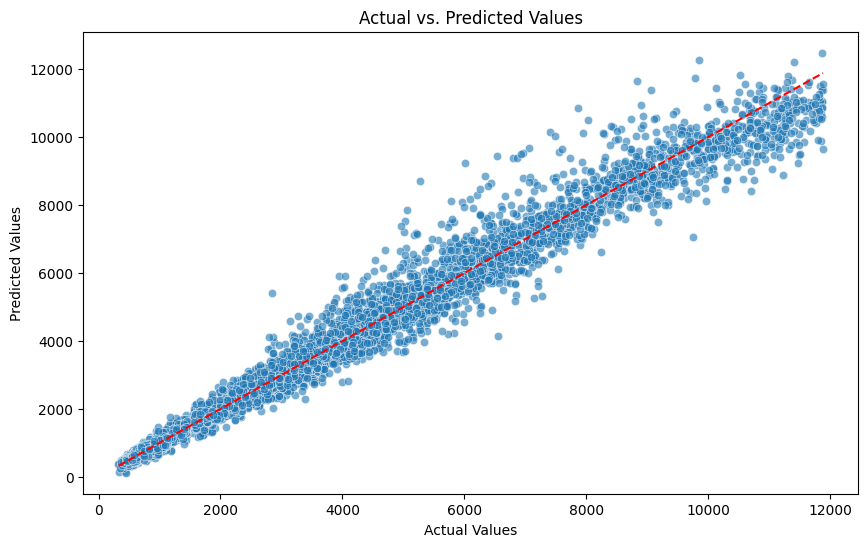

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on the test set
y_pred = final_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [120]:
df_cleaned.iloc[34018]

carat        0.40
depth       60.80
table       58.00
price      849.00
x            4.75
y            4.83
z            2.91
size        66.76
cut          4.00
color        5.00
clarity      6.00
Name: 34018, dtype: float64

In [118]:
X_test

,carat,size,cut,color,clarity
34018,0.40,66.76,4,5,6
44758,0.59,94.99,4,0,2
21937,1.60,268.40,2,6,4
12222,1.00,163.98,2,2,2
2116,0.70,116.38,2,2,2
...,...,...,...,...,...
40334,0.40,64.78,4,0,7
46984,0.59,96.56,2,0,2
51616,0.58,95.92,2,2,7
47680,0.51,83.39,2,0,5


In [115]:
y_pred = final_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.iloc[0]

Actual       849.00000
Predicted    903.13822
Name: 34018, dtype: float64

In [72]:
with open('final_model.pickle', 'wb') as model_file:
    pickle.dump(final_model, model_file)